# Lab.2 Logistic回归算法(线性)

## 1.读取数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [6]:
#使用loadtxt函数读取数据存于变量ex2data1
#使用变量X储存ex2data1的前两列数据（申请人的两科成绩）
#使用变量y储存ex2data1的第三列数据（标签，1表示能够入学，0表示不能入学）,存为列向量
#使用变量m储存样本数量
ex2data1 = np.loadtxt(r'D:\browser download\machine-learning-lab2.1\machine-learning-lab2.1\machine-learning-lab2.1\ex2data1.txt',delimiter=',')
X = ex2data1[:,0:2]
y = ex2data1[:,[2]]#注意存为列向量的写法
m = np.shape(y)[0]
print(X.shape, y.shape, m)

(100, 2) (100, 1) 100


## 2.可视化数据

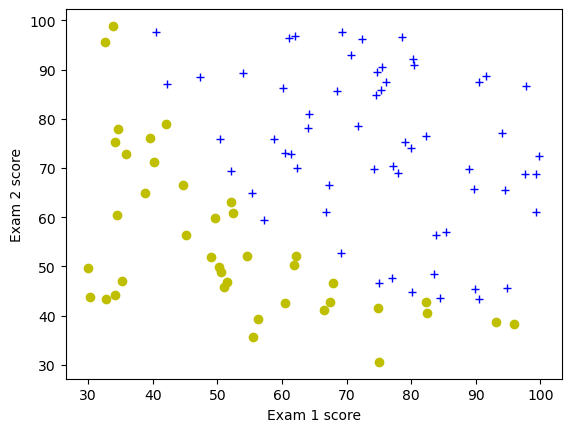

In [7]:
# 使用plt.scatter（）函数绘制散点图，使用不同颜色绘制正例和负例
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
for i in range(m):
    if y[i] == 1: #正例
        plt.plot(X[i,0], X[i,1], '+b')
    elif y[i] == 0: #反例
        plt.plot(X[i,0], X[i,1], 'oy')

## 3.训练Logistic回归模型


### 3.1数据预处理：准备输入数据、标签，初始化θ

In [14]:
# 前面已经使用m存放样本个数，X存放成绩信息，y存放标签
# 使用np.ones创建变量名为x0的数组，规模为m*1
# 使用np.hstack函数将x0和X进行合并存放于变量x
# 使用np.zeros初始化theta,规模为3*1（每个样本由两个特征值）
x0=np.ones((m,1))
x=np.hstack((x0,X))
n=X.shape[1]
theta=np.zeros((n+1,1))
print(x.shape, theta)


(100, 3) [[0.]
 [0.]
 [0.]]


### 3.2定义Sigmoid函数、损失函数、梯度

In [35]:
# 完成sigmoid函数
# 完成基于交叉熵的损失函数costFunction(),返回值为一维数组
# 完成梯度计算gradient()，返回值为一维数组
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

def costFunction(theta, x, y):
    theta = theta.reshape(len(theta), 1)# 为适应后面训练过程的维度要求，可先忽略
    m=len(y)
    h=sigmoid(np.dot(x,theta))
    J=(-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    J = J.flatten()# 返回一维数组，为适应后面训练过程的维度要求，可先忽略
    return J

def gradient(theta, x, y):
    theta = theta.reshape(len(theta), 1)# 为适应后面训练过程的维度要求，可先忽略
    m=len(y)
    h= sigmoid(np.dot(x,theta))
    grad=np.dot(x.T,(h-y))/m
    grad = grad.flatten() # 返回一维数组，为适应后面训练过程的维度要求，可先忽略
    return grad

cost = costFunction(theta, x, y)
grad = gradient(theta, x, y)
print('对初始零向量theta求得的cost为',cost,'\n梯度为',grad)

对初始零向量theta求得的cost为 [0.69314718] 
梯度为 [ -0.1        -12.00921659 -11.26284221]


### 3.3使用scipy.optimize.minimize求最小损失对应的参数theta

在Python中使用Scipy包下的scipy.optimize.minimize(fun, x0, args=(), method, jac)方法参数的维度要求很严格:  
1.fun为进行优化的目标函数，传入需调用的函数名（不需要加括号），此处为fun=costFunction。需注意调用的函数第一个参数（theta）和返回值（J）必须为一维数组  
2.x0即theta需传入一维数组  
3.args传入fun需要的其他参数，需用tuple传入  
4.method指定优化算法，此处我们使用method='TNC'  
5.jac调用梯度计算函数传入参数需与fun调用函数完全相同，且返回值为一维数组  
高维数组a调整为一维可以使用a.flatten() ，该函数会产生一个副本，不会直接改变a的维度

In [28]:
# 验证参数维度是否符合要求：代价函数和梯度函数的返回值为一维数组、传入x0的参数theta为一维数组
print(cost.ndim, grad.ndim,np.ndim(theta.flatten()))

1 1 1


In [60]:
# 使用minimize函数进行优化，使用变量result存放op.minimize()的返回值
# 使用theta_star存放最优的theta值（result中的x）
from scipy.optimize import minimize
result = minimize(fun=costFunction,x0=theta.flatten(),args=(x,y),method='TNC',jac=gradient)
theta_star = result.x
print(result)
print(theta_star)

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 0.20349770158947464
       x: [-2.516e+01  2.062e-01  2.015e-01]
     nit: 17
     jac: [ 9.565e-09  1.379e-07  4.947e-07]
    nfev: 36
[-25.16131857   0.20623159   0.20147149]


## 4.评估Logistic回归模型

### 4.1绘制决策边界



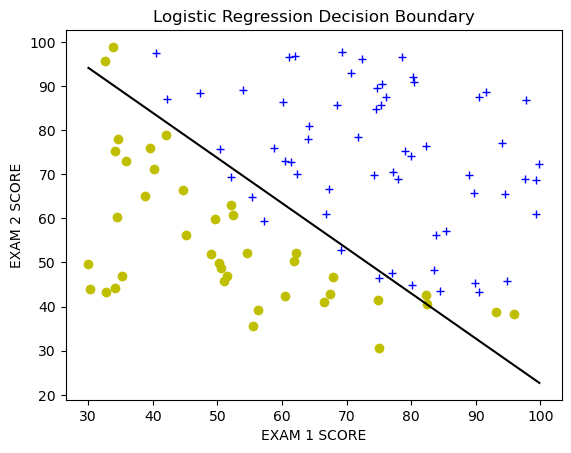

In [50]:
# 此时x是100*3的二维数组，绘图时用写法与初始有差异
# 决策边界为theta[0]+theta[1]*x1+theta[2]*x2=0
# 绘制穿过x1,y1)和(x2,y2)的直线可以使用plt.plot((x1,x2),(y1,y2))

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
for i in range(m):
    if y[i] == 1: #正例
        plt.plot(x[i,1], x[i,2], '+b')
    elif y[i] == 0: #反例
        plt.plot(x[i,1], x[i,2], 'oy')
theta_0=theta_star[0]
theta_1=theta_star[1]
theta_2=theta_star[2]
x_min = min(x[:, 1])
x_max = max(x[:, 1])
x_decision = [x_min, x_max]
y_decision = [-(theta_0 + theta_1 * x_min) / theta_2, -(theta_0 + theta_1 * x_max) / theta_2]

# 绘制决策边界和数据集散点图

plt.plot(x_decision, y_decision, color='black')
plt.xlabel('EXAM 1 SCORE')
plt.ylabel('EXAM 2 SCORE')

plt.title('Logistic Regression Decision Boundary')
plt.show()

### 4.2计算模型准确率

In [79]:
# 编写函数计算模型在训练集上的正确率

def predict(X, theta):
    possibility = sigmoid(np.dot(x,theta))
    return [1 if x >= 0.5 else 0 for x in possibility]
y0 = np.array(predict(X, theta_star))
y1 = y0.reshape(len(y0), 1)
acc = np.mean(y1 == y)
print(acc)
 

0.89


### 4.3使用训练得到的模型进行预测
用训练得到的theta_star，预测一个学生在考试1中获得45分，在考试2中获得85分，该生被录取的概率

In [83]:

def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g
def predict(x,theta):
    h=sigmoid(np.dot(x,theta))
    prediction=h
    return prediction

x_test=([1,45,85])
result1=predict(x_test,theta_star)
print(result1)


0.7762906213164001
